   sepal_length  sepal_width  petal_length  petal_width
0           5.1          3.5           1.4          0.2
1           4.9          3.0           1.4          0.2
2           4.7          3.2           1.3          0.2
3           4.6          3.1           1.5          0.2
4           5.0          3.6           1.4          0.2
0    Iris-setosa
1    Iris-setosa
2    Iris-setosa
3    Iris-setosa
4    Iris-setosa
Name: answer, dtype: object
0.9777777777777777


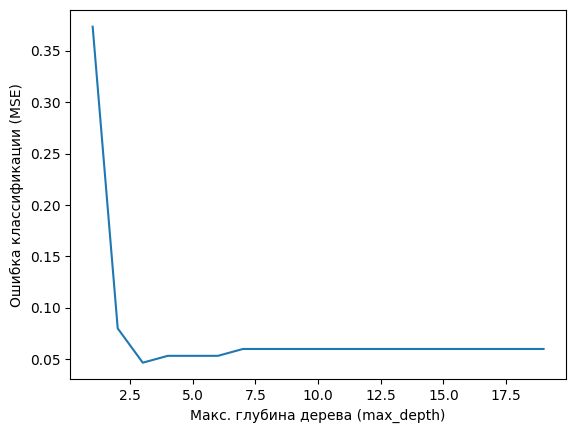

Оптимальные значения max_depth:  [3]
Fitting 10 folds for each of 57 candidates, totalling 570 fits
/n
Лучшее сочетание параметров:  {'max_depth': 2, 'max_features': 3}
Лучшие баллы cross validation:  0.9533333333333334
['Iris-setosa']


e:\Python\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
e:\Python\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
e:\Python\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
e:\Python\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
e:\Python\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
e:\Python\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitte

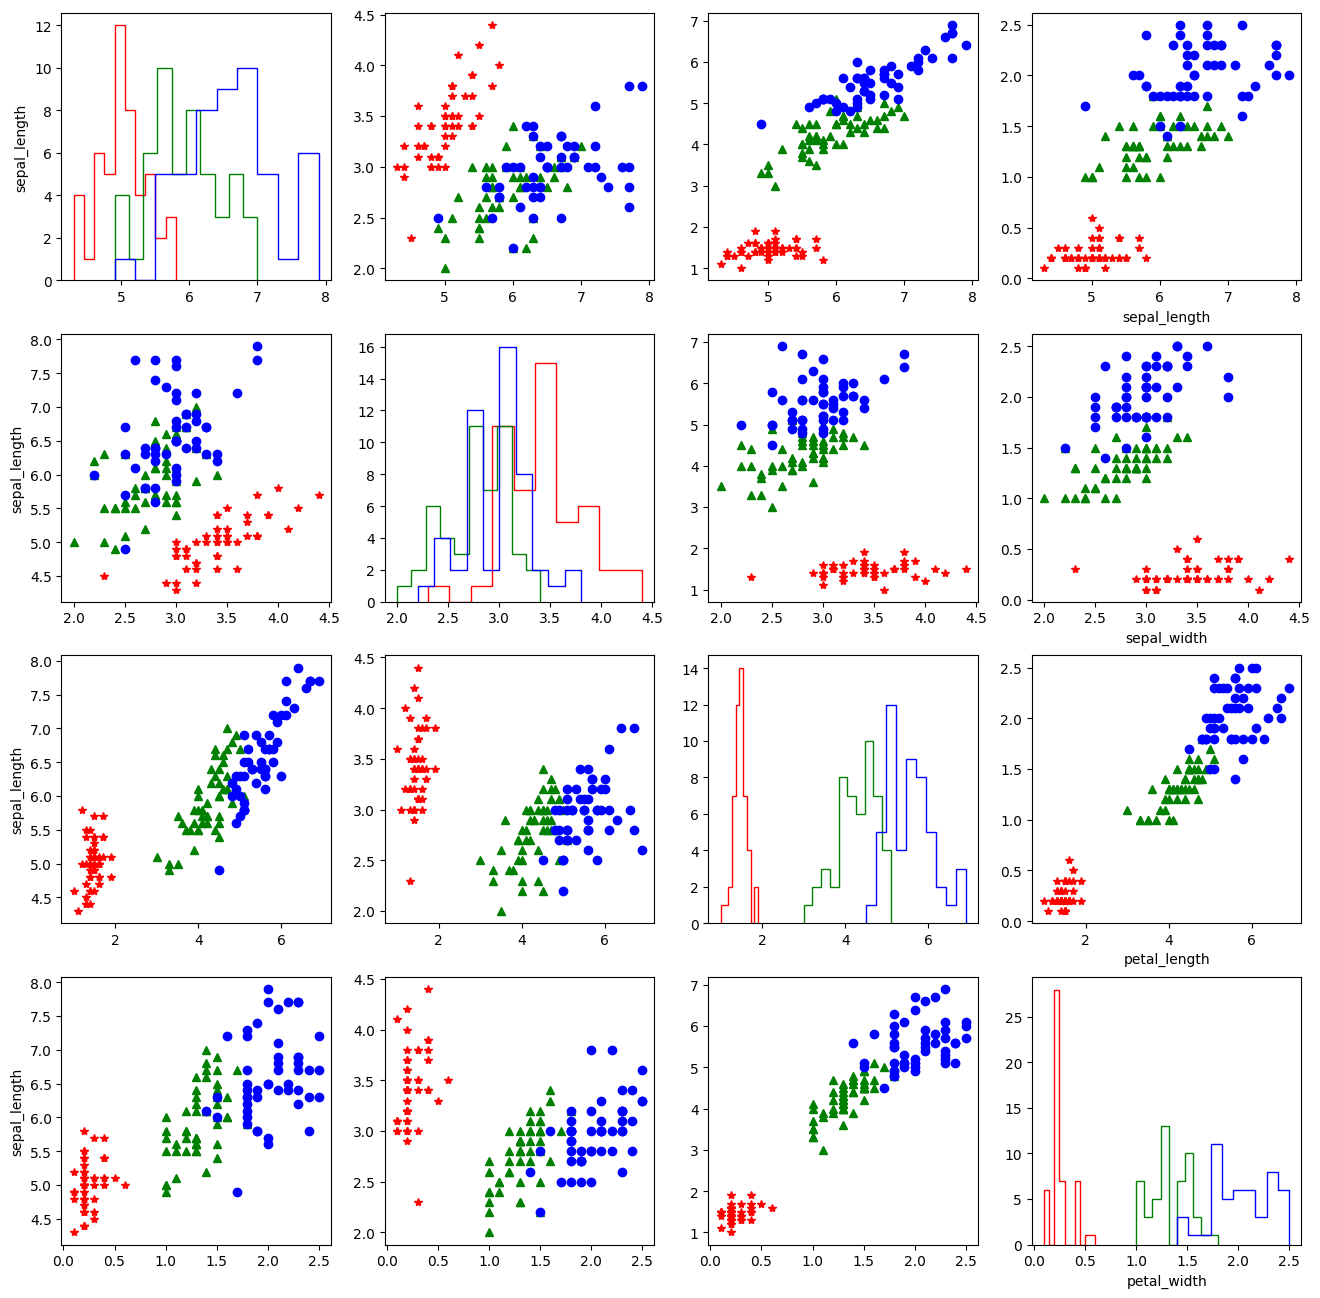

In [1]:
import numpy as np
import pandas as pd
%matplotlib inline
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn import tree


data_source = 'C:/Users/black/Downloads/iris.data'
d = pd.read_table(data_source, delimiter=',', 
                  header=None,
                  names=['sepal_length', 'sepal_width',
                         'petal_length', 'petal_width', 'answer'])
dX = d.iloc[ : , 0:4]
dy = d['answer']
print(dX.head())
print(dy.head())

X_train, X_holdout, y_train, y_holdout = \
train_test_split(dX, dy, test_size=0.3, random_state=12)
tree = DecisionTreeClassifier(max_depth=5,
                              random_state=21,
                              max_features=2)
tree.fit(X_train, y_train)

tree_pred = tree.predict(X_holdout)
accur = accuracy_score(y_holdout, tree_pred)
print(accur)

d_list = list(range(1, 20))
cv_scores = []
for d in d_list:
    tree = DecisionTreeClassifier(max_depth=d,
                                  random_state=21,
                                  max_features=2)
    scores = cross_val_score(tree, dX, dy, cv=10, scoring='accuracy')
    cv_scores.append(scores.mean())
MSE = [1-x for x in cv_scores]
plt.plot(d_list, MSE)
plt.xlabel('Макс. глубина дерева (max_depth)')
plt.ylabel('Ошибка классификации (MSE)')
plt.show()

d_min = min(MSE)

all_d_min = []
for i in range(len(MSE)):
    if MSE[i] <= d_min:
        all_d_min.append(d_list[i])
print('Оптимальные значения max_depth: ', all_d_min)

dtc = DecisionTreeClassifier(max_depth=10, random_state=21, max_features=2)

tree_params = {'max_depth': range(1, 20), 'max_features': range(1, 4)}
tree_grid = GridSearchCV(dtc, tree_params, cv=10, verbose=True, n_jobs=-1)
tree_grid.fit(dX, dy)
print('/n')
print('Лучшее сочетание параметров: ', tree_grid.best_params_)
print('Лучшие баллы cross validation: ', tree_grid.best_score_)

#tree.export_graphviz(tree_grid.best_estimator_,
#                     feature_names=dX.columns,
#                     class_names=dy.unique(),
#                     out_file='iris_tree.dot',
#                     filled =True, rounded=True)

dtc = DecisionTreeClassifier(max_depth=3,
                             random_state=21,
                             max_features=2)
dtc.fit(dX, dy)
res = dtc.predict([[5.1, 3.5, 1.4, 0.2]])
print(res)

plot_markers = ['r*', 'g^', 'bo']
answers = dy.unique()
f, places = plt.subplots(4, 4, figsize = (16,16))

fmin = dX.min()-0.5
fmax = dX.max()+0.5
plot_step = 0.02

for i in range(0,4):
    for j in range(0,4):
        if(i != j):
            xx, yy = np.meshgrid(np.arange(fmin[i], fmax[i], plot_step),
                                 np.arange(fmin[j], fmax[j], plot_step))
            model = DecisionTreeClassifier(max_depth=3, random_state=21, max_features=2)
            model.fit(dX.iloc[:, [i, j]], dy)
            p = model.predict(np.c_[xx.ravel(), yy.ravel()])
            p = p.reshape(xx.shape)
            p[p==answers[0]] = 0    
            p[p==answers[1]] = 1
            p[p==answers[2]] = 2
            #places[i,j].contourf(xx, yy, p, cmap = 'pastel1')   
        for id_answer in range(len(answers)):
            idx = np.where(dy == answers[id_answer])
            if i==j:
                places[i, j].hist(dX.iloc[idx].iloc[:, i],
                                  color = plot_markers[id_answer][0],
                                  histtype = 'step')
            else: 
                places[i, j].plot(dX.iloc[idx].iloc[:, i], dX.iloc[idx].iloc[:, j],
                                  plot_markers[id_answer],
                                  label=answers[id_answer], markersize=6)
        if j==0:
            places[i, j].set_ylabel(dX.columns[j])
        if j==3:
            places[i, j].set_xlabel(dX.columns[i])
